```
學號：0716026
姓名：蕭楚澔
```

In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf

## Data Input

In [2]:
# Data Input

# train data
with open('2021-nycu-ml-hw5/train.json') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)

# test data
with open('2021-nycu-ml-hw5/test.json') as f:
    data_test = json.load(f)
    
df_test = pd.DataFrame(data_test)

## Data Visualization

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


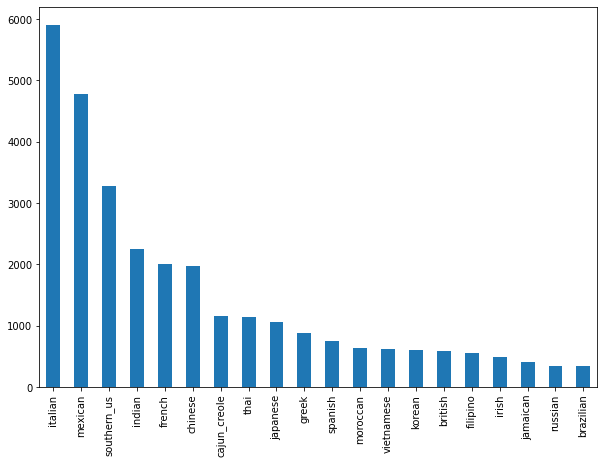

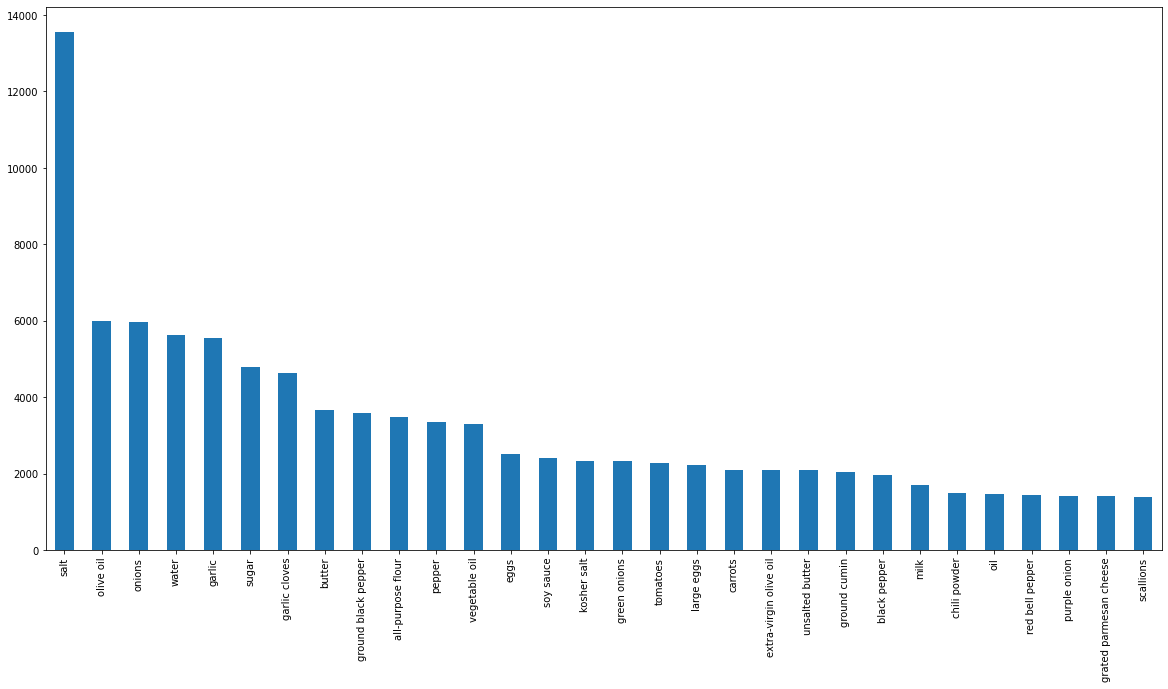

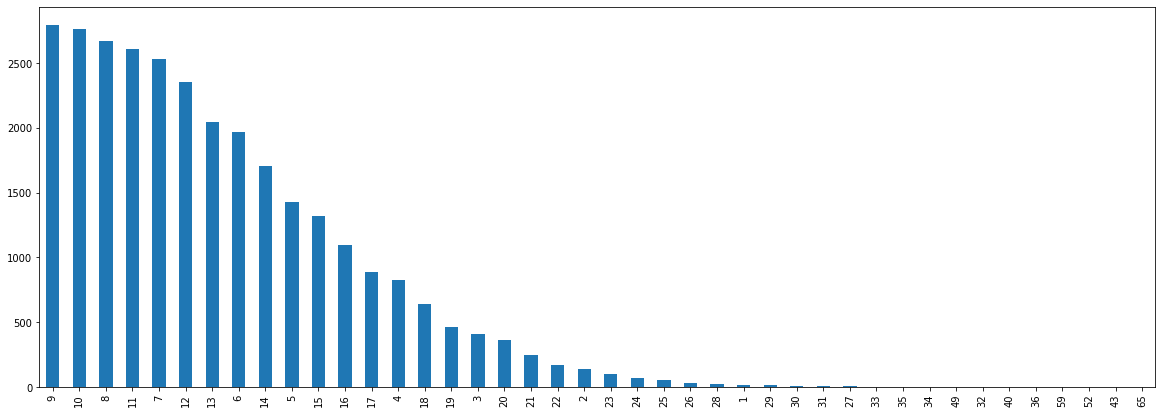

In [3]:
# Data Visualization

# Plot the data distribution by value count of their labels (targets).
plt.figure(figsize = (10, 7))
print(pd.value_counts(df['cuisine']).plot.bar())

# Plot the data distribution by value count of top 30 features.
plt.figure(figsize = (20, 10))
ing_col = []
for ing_list in df['ingredients']:
    for ing in ing_list:
        ing_col.append(ing)
df_ing = pd.DataFrame(ing_col, columns= ['ingredients'])
s = pd.value_counts(df_ing['ingredients'])
print(s[0:30].plot.bar())

# Plot the data distribution by value count of the number of ingredients.
num_col = []
for ing_list in df['ingredients']:
    num_col.append(len(ing_list))
df_num = pd.DataFrame(num_col, columns= ['number'])
plt.figure(figsize = (20, 7))
print(pd.value_counts(df_num['number']).plot.bar())

## Data Preprocessing
這個部分由於資料前處理花費太多時間了，因此我先將之前處理完成的data frame儲存起來，執行時只需要讀csv檔即可（註解的部分是完整的處理過程，可以省略）

In [4]:
# Data Preprocessing

# keys = s.keys()
# for key in keys:
#     df.loc[:, key] = 0
    
# for idx in range(len(df)):
#     for ing in df.loc[idx]['ingredients']:
#         df.loc[idx, ing] = 1

# df.to_csv("ingredients.csv")

df = pd.read_csv("ingredients.csv")
ds = df.drop(columns=['Unnamed: 0', 'id', 'ingredients']).copy(deep=True)

# Shuffle the data.
ds = shuffle(ds)

ds_X = ds.drop(columns=['cuisine']).copy(deep=True)
ds_y = ds['cuisine'].copy(deep=True)
label_encoder_y = LabelEncoder()
ds_y = label_encoder_y.fit_transform(ds_y)

# keys = s.keys()
# for key in keys:
#     df_test.loc[:, key] = 0
    
# for idx in range(len(df_test)):
#     for ing in df_test.loc[idx]['ingredients']:
#         df_test.loc[idx, ing] = 1

# df_test.to_csv("ingredients_test.csv")

df_test = pd.read_csv("ingredients_test.csv")
ds_test = df_test.drop(columns=['Unnamed: 0', 'id', 'ingredients']).copy(deep=True)

label_encoder_map = list(label_encoder_y.inverse_transform(range(20)))
X_train = ds_X.to_numpy()
y_train = ds_y
y_train = np_utils.to_categorical(y_train, 20)

## Artificial Neural Networks

In [5]:
# Artificial Neural Networks

# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu', input_dim=6213))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=20, activation='softmax'))

ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

```
Explain the reasoning of your model choice, data augmentation, and training process.
```
```
Ans: layer的選擇並沒有做太深入的研究(抱歉有點忙)，我稍微瀏覽幾個範例的做法然後自己嘗試後覺得這組model最準，因為tag總共有20組，所以最後一層的輸出放20。因為是multi classifier，所以使用categorical_crossentropy
```

## Validation Method

In [6]:
# Validation Method

X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size = 0.3, random_state=123)

ann.fit(X_val_train, y_val_train, batch_size = 800, epochs = 20)
y_pred = ann.predict(X_val_test)

Epoch 1/20
27/27 [==============================] - 3s 84ms/step - loss: 2.4881 - accuracy: 0.4494
Epoch 2/20
27/27 [==============================] - 2s 75ms/step - loss: 1.5618 - accuracy: 0.6188
Epoch 3/20
27/27 [==============================] - 2s 71ms/step - loss: 1.0904 - accuracy: 0.7280
Epoch 4/20
27/27 [==============================] - 2s 55ms/step - loss: 0.8429 - accuracy: 0.7890
Epoch 5/20
27/27 [==============================] - 1s 55ms/step - loss: 0.6922 - accuracy: 0.8240
Epoch 6/20
27/27 [==============================] - 2s 55ms/step - loss: 0.5910 - accuracy: 0.8499
Epoch 7/20
27/27 [==============================] - 2s 64ms/step - loss: 0.5173 - accuracy: 0.8668
Epoch 8/20
27/27 [==============================] - 2s 80ms/step - loss: 0.4609 - accuracy: 0.8801
Epoch 9/20
27/27 [==============================] - 2s 56ms/step - loss: 0.4151 - accuracy: 0.8931
Epoch 10/20
27/27 [==============================] - 1s 54ms/step - loss: 0.3777 - accuracy: 0.9015
Epoch 11/

## Results

In [7]:
# Result

predict_result = []
answer = []
for pre in y_pred:
    pre = list(pre)
    max_value = max(pre)
    max_index = pre.index(max_value)
    predict_result.append(label_encoder_map[max_index])
    
for val in y_val_test:
    val = list(val)
    max_value = max(val)
    max_index = val.index(max_value)
    answer.append(label_encoder_map[max_index])

In [8]:
print("Confusion matrix")
cm = confusion_matrix(answer, predict_result)
cm = pd.DataFrame(cm)
cm

Confusion matrix


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,65,0,2,0,2,0,0,4,0,1,0,0,0,15,0,0,2,5,0,0
1,0,83,1,1,4,25,1,4,14,9,0,0,0,0,0,4,28,1,0,0
2,0,1,233,0,0,12,0,1,1,19,0,0,0,5,0,1,56,5,0,0
3,1,0,3,451,12,2,0,6,0,9,0,25,18,11,0,0,14,0,14,9
4,4,0,1,8,93,2,0,1,1,5,1,2,2,3,0,0,11,2,4,7
5,1,18,7,2,1,367,8,6,9,138,0,5,0,6,4,6,40,5,0,0
6,0,0,0,0,0,8,158,7,0,42,0,1,0,3,10,1,7,7,0,0
7,2,3,0,3,0,9,2,564,2,10,1,12,1,6,12,1,8,0,12,1
8,0,24,1,0,0,14,1,3,65,12,0,0,0,2,0,3,21,1,0,0
9,1,7,9,3,0,113,19,2,6,1562,0,3,0,15,3,3,28,20,0,0


In [9]:
import prettytable as pt

acc = np.around(accuracy_score(answer, predict_result), 5)
rec = np.around(recall_score(answer, predict_result, labels=label_encoder_map, average=None), 5)
pre = np.around(precision_score(answer, predict_result, labels=label_encoder_map, average=None), 5)
rec_str = ""
for j in range(0, len(label_encoder_map)):
    add_str = str(label_encoder_map[j])+": "+str(rec[j])+"\n"
    rec_str+=add_str
pre_str = ""
for j in range(0, len(label_encoder_map)):
    add_str = str(label_encoder_map[j])+": "+str(pre[j])+"\n"
    pre_str+=add_str
    
output = pt.PrettyTable()
output.field_names = ["Performance", "Result"]
output.add_row(['Accuracy\n', acc])
output.add_row(['Sensitivity (Recall)', rec_str])
output.add_row(['Precision', pre_str])
print(output)

+----------------------+-----------------------+
|     Performance      |         Result        |
+----------------------+-----------------------+
|       Accuracy       |        0.76592        |
|                      |                       |
| Sensitivity (Recall) |   brazilian: 0.67708  |
|                      |    british: 0.47429   |
|                      |  cajun_creole: 0.6976 |
|                      |    chinese: 0.78435   |
|                      |   filipino: 0.63265   |
|                      |    french: 0.58909    |
|                      |     greek: 0.64754    |
|                      |    indian: 0.86903    |
|                      |     irish: 0.44218    |
|                      |    italian: 0.87068   |
|                      |   jamaican: 0.60169   |
|                      |   japanese: 0.74598   |
|                      |      korean: 0.73     |
|                      |    mexican: 0.89619   |
|                      |   moroccan: 0.75362   |
|                   

## Comparison & Conclusion

```
這是我第一次接觸neural network的內容，感覺和之前的作業截然不同，前四個作業的原理比較直覺一點，就是單純的分類，neural network則是需要一層層隱藏的layer慢慢修正直到越來越接近正確結果，剛開始接觸有點不知如何下手，不過稍微操作過就了解他的原理了
```
```
期末有點忙，這份作業感覺沒有做得很好，應該可以再調整一下參數讓準度上升
```

## Kaggle Submission

In [10]:
X_test = ds_test.to_numpy()
predictions = ann.predict(X_test)

final_result = pd.DataFrame({})
predict_result = []

for pre in predictions:
    pre = list(pre)
    max_value = max(pre)
    max_index = pre.index(max_value)
    predict_result.append(label_encoder_map[max_index])

final_result['id'] = df_test['id'].copy(deep=True)
final_result['Category'] = predict_result

final_result.to_csv('result.csv', index=False)

<img src="Kaggle.jpg">